## Fossil Cluster Statistics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib.lines import Line2D
import pandas as pd
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
from itertools import groupby
from matplotlib.ticker import ScalarFormatter
%load_ext line_profiler
%reload_ext autoreload
%autoreload 1
%aimport help_func

In [2]:
forest_table = pd.read_hdf('/data/a/cpac/aurora/reducedtrees0.h5', 'ft')
with open("/data/a/cpac/xinliu/reducedtrees/progenitor_idx0.txt") as f:
    progenitor_idx = [[int(p) for p in s.strip().split(" ")] if s.strip() != "" else [] for s in f]

#### Establish Globals

In [374]:
n = 10
snap = 99 
snap2 = 98
snap3 = 97
mm_thresh1 = 1/10
mm_thresh2 = 0.3
norm = np.int(2.7*10**9)
xaxis = 'z_nums'
extremum = ''
my_range = [10**13, 10**14]
my_range_str = ["{:.2e}".format(my_range[0]), "{:.2e}".format(my_range[1])]
#bins = [10**9.5, 10**10.5, 10**11.5, 10**12.5, 10**13.5, 10**14.5]
three_bins = [10**11.5, 10**12.5, 10**13.5, 10**14.5]
three_bins2 = [10**12.5, 10**13, 10**13.5, 10**14.5]
five_bins = [10**9.5, 10**10.5, 10**11.5, 10**12.5, 10**13.5, 10**14.5]
five_bins2 = [10**12, 10**12.5, 10**13, 10**13.5, 10**14, 10**14.5]
five_bins3 = [10**12, 10**12.5, 10**13, 10**13.5, 10**14, 10**15]
four_bins = [10**12.5, 10**13, 10**13.5, 10**14, 10**14.5]
two_bins = [3*10**13, 3*10**14, 3*10**16]
rangel_bins = [1*10**11, 1.5*10**11, 2.3*10**11, 3.5*10**11, 5.3*10**11, 8.1*10**11, 1.2*10**12, 1.9*10**12, 2.8*10**12, 4.3*10**12, 6.6*10**12, 1*10**13]
rangel_bins2 = np.concatenate(([rangel_bins[0] - 0.25*10**11], [(rangel_bins[i] + rangel_bins[i+1]) / 2 for i in np.arange(len(rangel_bins) -1)], [rangel_bins[-1] + 3.4*10**13]), axis = 0)
norm_tf = True
avg_tf = True
# Convert snapshots to redshifts
redshifts = np.flip(np.array([10.044, 9.8065, 9.5789, 9.3608, 9.1515, 8.7573, 8.5714, 8.3925, 8.0541, 7.8938, 7.7391, 7.4454, 7.3058, 7.04, 6.9134, 6.6718, 6.5564, 6.3358, 6.1277, 6.028, 5.8367, 5.6556, 5.4839, 5.3208, 5.2422, 5.0909, 4.9467, 4.7429, 4.6145, 4.4918, 4.3743, 4.2618, 4.1015, 4.00, 3.8551, 3.763, 3.6313, 3.5475, 3.4273, 3.3133, 3.205, 3.102, 3.0361, 2.9412, 2.8506, 2.7361, 2.6545, 2.5765, 2.4775, 2.4068, 2.3168, 2.2524, 2.1703, 2.0923, 2.018, 1.9472, 1.8797, 1.7994, 1.7384, 1.68, 1.6104, 1.5443, 1.4938, 1.4334, 1.3759, 1.321, 1.2584, 1.2088, 1.152, 1.1069, 1.0552, 1.006, 0.9591, 0.9143, 0.8646, 0.824, 0.7788, 0.7358, 0.6948, 0.6557, 0.6184, 0.5777, 0.5391, 0.5022, 0.4714, 0.4337, 0.4017, 0.3636, 0.3347, 0.3035, 0.2705, 0.2423, 0.2123, 0.1837, 0.1538, 0.1279, 0.1008, 0.0749, 0.0502, 0.0245, 0.00]))

### 6a) Find all halos with LMM > 1

In [376]:
# Find and bin the halos
bin_halo_idx = help_func.bin_halos(forest_table, snap, three_bins2)
# Track them (and take their averages in the process)
xaxis = 'z_nums'
binned_snap_nums, binned_masses, binned_main_prog_list, binned_maj_mergers, binned_mm_times = help_func.track_evol_binned(bin_halo_idx, three_bins2, redshifts, progenitor_idx, forest_table, x_axis = xaxis)

In track_evol_multiple
In track_evol_multiple
In track_evol_multiple


In [398]:
binned_LMM_list, binned_LMM_times = help_func.find_LMMs_binned(binned_maj_mergers, binned_mm_times, forest_table, xaxis)

In [401]:
tst_idx, core_idx = help_func.find_large_LMM_halos(binned_LMM_list, binned_LMM_times, forest_table)

In [454]:
print(len(core_idx[0][0]))

229


#### Check your sanity

##### What are the core_ids? Do they go all the way to z = 0?

In [475]:
print(binned_LMM_list[0][0][0])
print(forest_table.snap_num[binned_LMM_list[0][0][0]])
print(tst_idx[0][0][0])
print(core_idx[0][0][0])

2899652.0
70
6207206
189151669680865283


In [477]:

forest_table.loc[forest_table.core_id == core_idx[0][1][10]]

,halo_id,core_id,descendant_id,descendant_idx,snap_num,scale_factor,mass,pos_x,pos_y,pos_z,vel_x,vel_y,vel_z,vel_disp,vmax
275,275,202662524397551630,384,384,2,0.0,9.726568,241.857544,245.290802,181.604385,1068.012939,-301.630798,1211.797119,433.808350,46.939880
384,384,202662524397551630,535,535,3,0.0,9.263399,241.862411,245.302490,181.604614,911.688416,89.124878,-151.928055,446.148590,46.939880
535,535,202662524397551630,781,781,4,0.0,9.726568,241.874725,245.294891,181.593262,540.785339,-721.498047,-349.337006,507.164154,48.063904
781,781,202662524397551630,1092,1092,5,0.0,10.189739,241.889938,245.295532,181.592911,2293.758301,-313.520294,830.826904,530.199158,51.131111
1092,1092,202662524397551630,1508,1508,6,0.0,11.579248,241.893372,245.296387,181.581238,143.953476,-894.277466,-1445.246216,517.981140,50.867104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5706277,5706277,202662524397551630,5829295,5829295,95,0.0,2246.374268,243.341949,248.049484,180.458939,120.400879,331.609741,-624.515869,136.152115,339.090210
5829295,5829295,202662524397551630,5953557,5953557,96,0.0,2271.385254,243.375534,248.096512,180.417114,290.243988,301.557983,-116.919067,116.152733,339.641510
5953557,5953557,202662524397551630,6079218,6079218,97,0.0,2297.322754,243.411438,248.144440,180.368073,194.206985,122.303818,-183.404831,131.502792,345.253448
6079218,6079218,202662524397551630,6207254,6207254,98,0.0,2333.450195,243.455780,248.188644,180.325836,412.947754,358.249817,213.947754,121.083855,348.023102


In [472]:
t_vals = 0
f_vals = 0
for i in range(len(tst_idx)):
    for j in range(len(tst_idx[i])):
        for k in range(len(tst_idx[i][j])):
            if max(forest_table.halo_id.loc[forest_table.core_id == core_idx[j][i][k]]) == tst_idx[i][j][k]:
                if np.array(forest_table.snap_num.loc[forest_table.halo_id == tst_idx[i][j][k]]) > 90:
                    t_vals = t_vals + 1
                else:
                f_vals = f_vals + 1
print(t_vals)
print(f_vals)

837
0


##### What if I feed this back to the beginning?

In [414]:
new_halo_idx = tst_idx[0] # The first threshold
# Track them (and take their averages in the process)
new_snap_nums, new_masses, new_main_prog_list, new_maj_mergers, new_mm_times = help_func.track_evol_binned(new_halo_idx, three_bins2, redshifts, progenitor_idx, forest_table, x_axis = xaxis)
for i in range(len(new_masses)):
    print("len(new_masses[", i, "]", len(new_masses[i]))

In track_evol_multiple
In track_evol_multiple
In track_evol_multiple
len(new_masses[ 0 ] 229
len(new_masses[ 1 ] 44
len(new_masses[ 2 ] 7


In [448]:
new_LMM_list, new_LMM_times = help_func.find_LMMs_binned(new_maj_mergers, new_mm_times, forest_table, xaxis)
for this_bin in range(len(new_LMM_list)):
    for this_thresh in range(len(new_LMM_list[this_bin])):
        print("For bin: ", this_bin, ' and thresh: ', this_thresh, " there are ", len(new_LMM_list[this_bin][this_thresh]), " LMM entries")

For bin:  0  and thresh:  0  there are  229  LMM entries
For bin:  0  and thresh:  1  there are  222  LMM entries
For bin:  1  and thresh:  0  there are  44  LMM entries
For bin:  1  and thresh:  1  there are  44  LMM entries
For bin:  2  and thresh:  0  there are  7  LMM entries
For bin:  2  and thresh:  1  there are  7  LMM entries


#### Plot just one

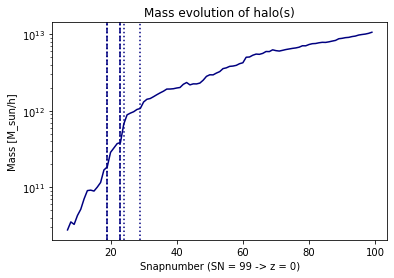

In [482]:
new_halo_idx = int(tst_idx[1][1][18]) # The first threshold # Do I need that int()?
xaxis = 'snap_nums'
# Track them (and take their averages in the process)
new_z_nums1, new_masses1, new_main_prog_list1, new_maj_mergers1, new_mm_times1 = help_func.track_evol(new_halo_idx, redshifts, progenitor_idx, forest_table, x_axis = xaxis)
help_func.plot_evol([new_z_nums1], [new_masses1], forest_tbl = forest_table, major_mergers = [new_maj_mergers1], x_axis = xaxis)

In [483]:
new_LMM_list1, new_LMM_times1 = help_func.find_LMMs_binned([new_maj_mergers1], [new_mm_times1], forest_table, xaxis)
plt = help_func.plot_CDF(new_LMM_times1, new_masses1, large_bins, redshifts)

TypeError: object of type 'numpy.float64' has no len()

##### Sanity Checks

How many values did it identify?

In [392]:
count = 0
for i in range(len(tst_idx)): # 5 bins
    for j in range(len(tst_idx[i])): # 2 thresholds
        count = count + len(tst_idx[i][j]) # len = number of halos in that row
        if len(tst_idx[i][j]) > 0:
            print("at i: ", i, " and j: ", j, " len(tst_idx[i][j]) is: ", len(tst_idx[i][j]))
print(count)

at i:  0  and j:  0  len(tst_idx[i][j]) is:  833
at i:  0  and j:  1  len(tst_idx[i][j]) is:  229
at i:  0  and j:  2  len(tst_idx[i][j]) is:  44
at i:  0  and j:  3  len(tst_idx[i][j]) is:  7
at i:  1  and j:  0  len(tst_idx[i][j]) is:  1409
at i:  1  and j:  1  len(tst_idx[i][j]) is:  440
at i:  1  and j:  2  len(tst_idx[i][j]) is:  95
at i:  1  and j:  3  len(tst_idx[i][j]) is:  22
3079


What do the halo evolutions of those values look like?

In [359]:
new_snap_nums, new_masses, new_main_prog_list, new_maj_mergers, new_mm_times = help_func.track_evol_binned(tst_idx[0], five_bins2, redshifts, progenitor_idx, forest_table, x_axis = xaxis)
help_func.plot_evol(new_snap_nums, new_masses, forest_table, major_mergers = new_maj_mergers, x_axis = xaxis)
new_LMM_list, new_LMM_times = help_func.find_LMMs_binned([maj_mergers], [mm_times], forest_table, xaxis)

In track_evol_multiple
len(idx[i]):  833
len(major_mergers):  833
In track_evol_multiple
len(idx[i]):  229
len(major_mergers):  229
In track_evol_multiple
len(idx[i]):  44
len(major_mergers):  44
In track_evol_multiple
len(idx[i]):  7
len(major_mergers):  7
In track_evol_multiple
len(idx[i]):  0
len(major_mergers):  0
bin:  100000000000000
major_mergers:  []


IndexError: list index out of range

In [316]:
cores = [np.array(forest_table.core_id.loc[forest_table.halo_id == i]) for i in tst_idx[1][0]]
cores

[array([378302879800230312]),
 array([387310057580134590]),
 array([405324451794650668])]

In [ ]:
forest_table[np.array(forest_table['core_id'] == 324259692861719049)]

In [278]:
print(forest_table.snap_num.loc[forest_table.core_id == 324259692861719049])
print(max(forest_table.halo_id.loc[forest_table.core_id == 324259692861719049]))

46114     20
53984     21
63197     22
73809     23
85197     24
98246     25
113068    26
130211    27
149186    28
170013    29
192754    30
217513    31
244943    32
274457    33
306733    34
340951    35
377818    36
416814    37
Name: snap_num, dtype: int32
416814


In [266]:
tst_idx[1][0]

[6212633, 6213162, 6214418]

In [257]:
forest_table.loc[forest_table.halo_id == 6212633]

,halo_id,core_id,descendant_id,descendant_idx,snap_num,scale_factor,mass,pos_x,pos_y,pos_z,vel_x,vel_y,vel_z,vel_disp,vmax
6212633,6212633,378302879800230312,-1,-1,99,0.0,370.53595,230.123062,81.656616,209.772369,-686.837158,123.222313,321.681183,67.675171,182.241776


Right number of halos in this list?

In [251]:
counts = sum([sum([len(tst[i][j]) for j in range(len(tst[i]))]) for i in range(len(tst))])
counts

3082

In [326]:
binned_LMM_list

[[[2134844.0, 5959611.0, 5111932.0], [1458395.0, 1169334.0, 2811716.0]]]

#### Old Stuff

In [ ]:
group = groupby(forest_table['core_id'])

In [ ]:
data = np.sort(forest_table['core_id'])
hist_keys = [key for key, group in groupby(data)] # Redshift values
hist_values = [len(list(group)) for key, group in groupby(data)]
fig, ax = plt.subplots()
ax.plot(hist_keys, hist_values)

All that tells me that core_ids are repeated -- I can use them to associate halo_id's with their root halo :)

In [ ]:
forest_table['snap_num'][np.array(forest_table['core_id'] == 189151665385897997)]